In [1]:
import pandas as pd
import numpy as np

import lime

import matplotlib.pyplot as plt

import random
import warnings

warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()

for line in boston.DESCR.split("\n")[5:29]:
    print(line)

boston_df = pd.DataFrame(data=boston.data, columns = boston.feature_names)
boston_df["Price"] = boston.target

boston_df.head()

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

# Divide Dataset into Train/Test Sets

Below we have divided the original dataset into the train (90%) and test (10%) sets.


In [3]:
from sklearn.model_selection import train_test_split

X, Y = boston.data, boston.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.90, test_size=0.1, random_state=123, shuffle=True)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((455, 13), (51, 13), (455,), (51,))

## We have now fitted a linear regression model from scikit-learn on train dataset and then printed r2 score of the trained model on test & train data.

In [4]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

print("Test R^2 Score  : ", lr.score(X_test, Y_test))
print("Train R^2 Score : ", lr.score(X_train, Y_train))

Test R^2 Score  :  0.6412254020969466
Train R^2 Score :  0.7511685217987627


## LimeTabularExplainer

## The lime_tabular module has a class named LimeTabularExplainer which takes as input train data and generated explainer object which can then be used to explain individual prediction. Below is a list of important parameters of the LimeTabularExplainer class.

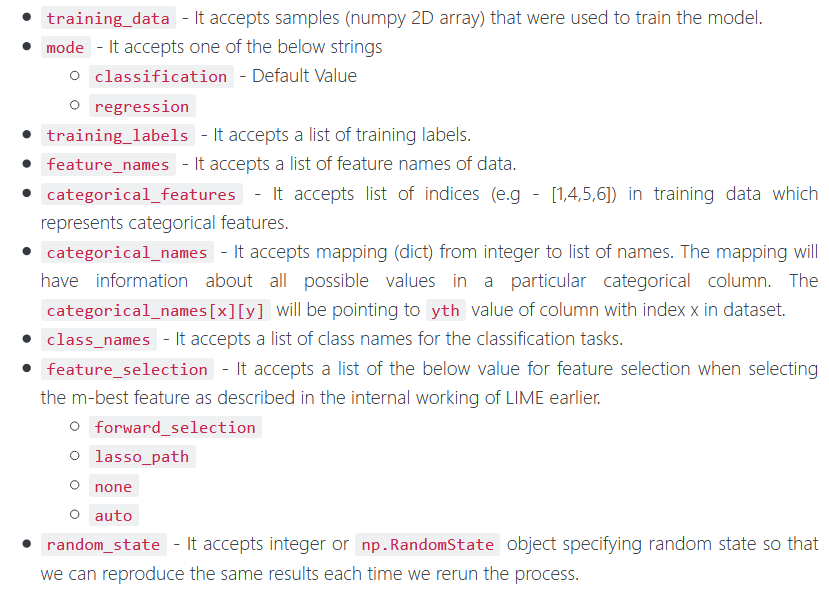

In [5]:
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(X_train, mode="regression", feature_names= boston.feature_names)
explainer

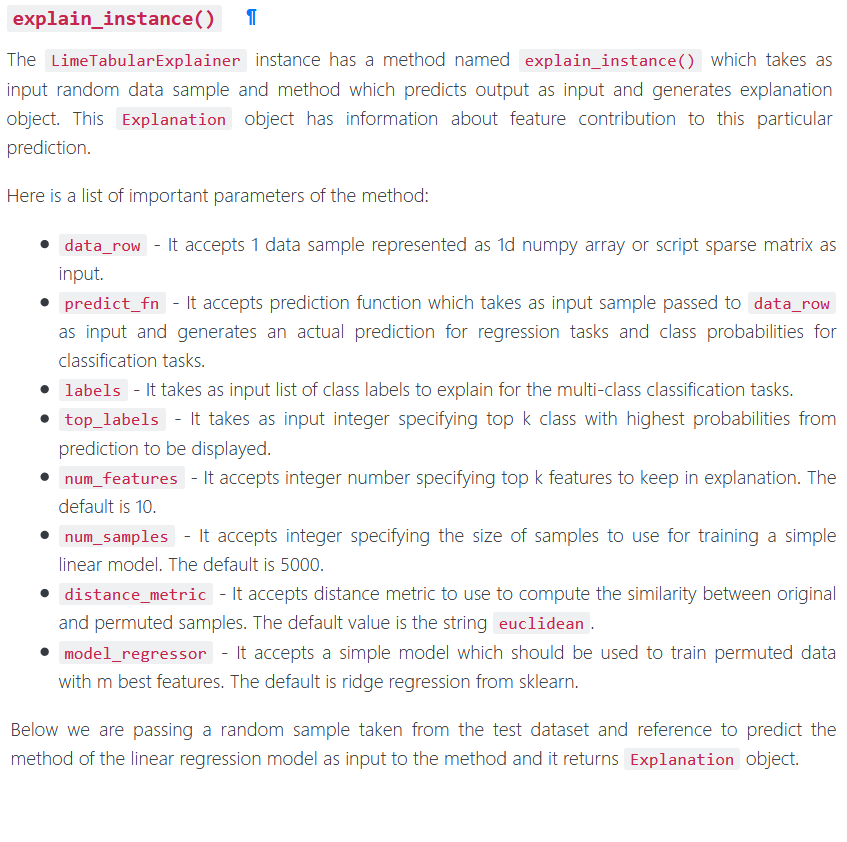

In [7]:
idx = random.randint(1, len(X_test))

print("Prediction : ", lr.predict(X_test[idx].reshape(1,-1)))
print("Actual :     ", Y_test[idx])

explanation = explainer.explain_instance(X_test[idx], lr.predict, num_features=len(boston.feature_names))
explanation

Prediction :  [18.00894494]
Actual :      20.8


In [8]:
explanation.show_in_notebook()

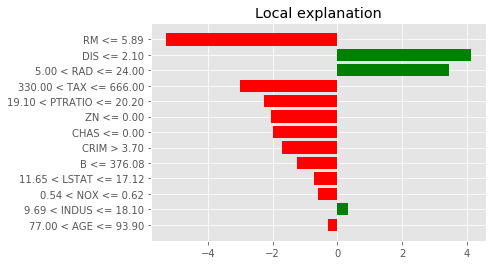

In [9]:
with plt.style.context("ggplot"):
    explanation.as_pyplot_figure()

### Below we have printed actual global weights we got from the linear regression model as a matplotlib bar chart.

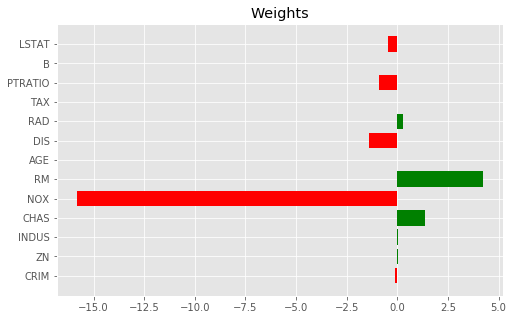

In [10]:
with plt.style.context("ggplot"):
    fig = plt.figure(figsize=(8,5))
    plt.barh(range(len(lr.coef_)), lr.coef_, color=["red" if coef<0 else "green" for coef in lr.coef_])
    plt.yticks(range(len(lr.coef_)), boston.feature_names);
    plt.title("Weights")

## Below we are calling the as_list() method on the Explanation object which returns explanation as a list of tuple where the first value of tuple is condition and the second value contribution of the feature value based on condition.

In [11]:
explanation.as_list()

[('RM <= 5.89', -5.289876833978714),
 ('DIS <= 2.10', 4.121492947984791),
 ('5.00 < RAD <= 24.00', 3.443033701861265),
 ('330.00 < TAX <= 666.00', -3.0186023176781256),
 ('19.10 < PTRATIO <= 20.20', -2.2549035189268722),
 ('ZN <= 0.00', -2.0509952172651125),
 ('CHAS <= 0.00', -1.9858354943556142),
 ('CRIM > 3.70', -1.7250388209818082),
 ('B <= 376.08', -1.2468725349911407),
 ('11.65 < LSTAT <= 17.12', -0.7211502893007998),
 ('0.54 < NOX <= 0.62', -0.5933968347313313),
 ('9.69 < INDUS <= 18.10', 0.325218184994503),
 ('77.00 < AGE <= 93.90', -0.3050404656872493)]

## Below we have called the as_map() method which is exactly the same as the as_list() method for regression but useful for classification task because it'll return a dictionary where the key is each class of task and value is a list of feature index and their contribution in predicting that class.

In [12]:
explanation.as_map()

{0: [(5, 5.289876833978714),
  (7, -4.121492947984791),
  (8, -3.443033701861265),
  (9, 3.0186023176781256),
  (10, 2.2549035189268722),
  (1, 2.0509952172651125),
  (3, 1.9858354943556142),
  (0, 1.7250388209818082),
  (11, 1.2468725349911407),
  (12, 0.7211502893007998),
  (4, 0.5933968347313313),
  (2, -0.325218184994503),
  (6, 0.3050404656872493)],
 1: [(5, -5.289876833978714),
  (7, 4.121492947984791),
  (8, 3.443033701861265),
  (9, -3.0186023176781256),
  (10, -2.2549035189268722),
  (1, -2.0509952172651125),
  (3, -1.9858354943556142),
  (0, -1.7250388209818082),
  (11, -1.2468725349911407),
  (12, -0.7211502893007998),
  (4, -0.5933968347313313),
  (2, 0.325218184994503),
  (6, -0.3050404656872493)]}

# AS HTML

## The explanation object has another method named as_html() which returns explanation as HTML stored in a string. We can pass this string to IPython's HTML method for generating HTML output.

In [13]:
from IPython.display import HTML

html_data = explanation.as_html()
HTML(data=html_data)

## below we have printed local prediction and global prediction using explanation. The local prediction is generated by a simple model that was trained on a combination of m best feature permuted data and similarity scores data. We can see that it’s quite close to the actual prediction using our complex model.

## Below we have printed local prediction and global prediction using explanation. The local prediction is generated by a simple model that was trained on a combination of m best feature permuted data and similarity scores data. We can see that it’s quite close to the actual prediction using our complex model.

In [14]:
explanation.save_to_file("classif_explanation.html")

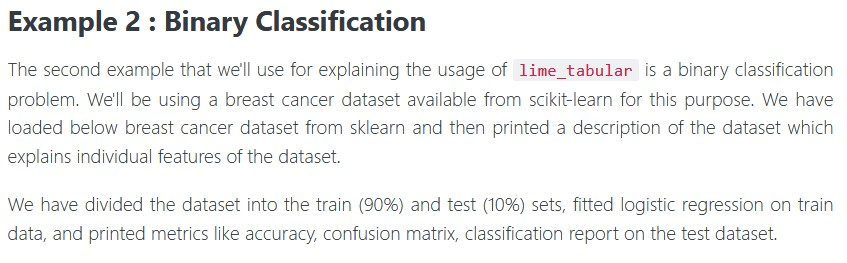

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

breast_cancer = load_breast_cancer()

for line in breast_cancer.DESCR.split("\n")[5:32]:
    print(line)

X, Y = breast_cancer.data, breast_cancer.target

print("Data Size : ", X.shape, Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.90, test_size=0.1, stratify=Y, random_state=123)

print("Train/Test Sizes : ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

lr = LogisticRegression()

lr.fit(X_train, Y_train)

print("Test  Accuracy : %.2f"%lr.score(X_test, Y_test))
print("Train Accuracy : %.2f"%lr.score(X_train, Y_train))
print()
print("Confusion Matrix : ")
print(confusion_matrix(Y_test, lr.predict(X_test)))
print()
print("Classification Report")
print(classification_report(Y_test, lr.predict(X_test)))

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radius, field
        10 is Radius SE, field 20 is Worst Radius.

        - class:
                - WDBC-Malignant
       

## Below we have created a LimeTabularExplainer object based on the training dataset. We'll be using this explainer object to explain a random sample from the test dataset.

In [16]:
explainer = lime_tabular.LimeTabularExplainer(X_train, mode="classification",
                                              class_names=breast_cancer.target_names,
                                              feature_names=breast_cancer.feature_names,
                                             )

explainer

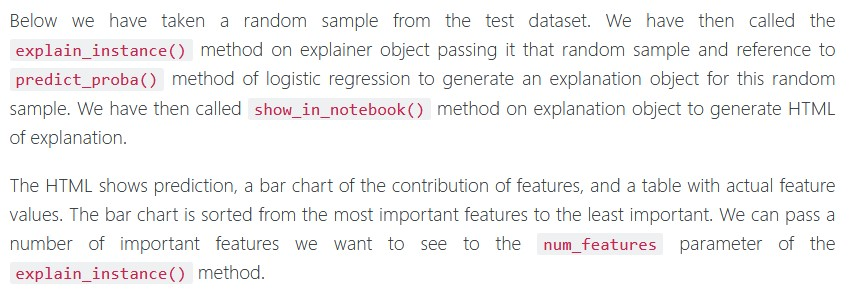

In [24]:
idx = random.randint(1, len(X_test))

print("Prediction : ", breast_cancer.target_names[lr.predict(X_test[idx].reshape(1,-1))[0]])
print("Actual :     ", breast_cancer.target_names[Y_test[idx]])

explanation = explainer.explain_instance(X_test[idx], lr.predict_proba,
                                         num_features=len(breast_cancer.feature_names))

explanation.show_in_notebook()

Prediction :  benign
Actual :      benign


## Below we have plotted a bar chart of global feature importance based on weights derived from logistic regression. We can use it to compare it with the bar chart generated for individual data samples.

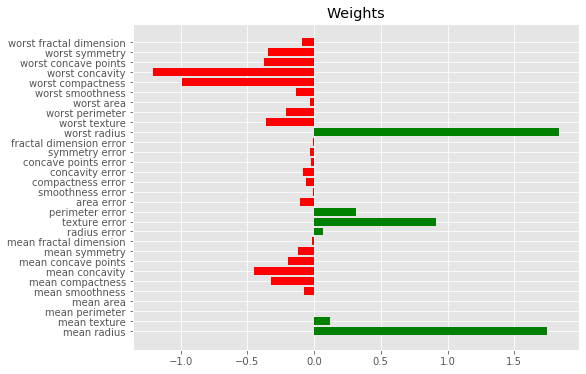

In [25]:
with plt.style.context("ggplot"):
    fig = plt.figure(figsize=(8,6))
    plt.barh(range(len(lr.coef_[0])), lr.coef_[0], color=["red" if coef<0 else "green" for coef in lr.coef_[0]])
    plt.yticks(range(len(lr.coef_[0])), breast_cancer.feature_names);
    plt.title("Weights")

In [26]:
print("Explanation Local Prediction              : ","malignant" if explanation.local_pred<0.5 else "benign")
print("Explanation Global Prediction Probability : ", explanation.predict_proba)
print("Explanation Global Prediction             : ", breast_cancer.target_names[np.argmax(explanation.predict_proba)])

Explanation Local Prediction              :  benign
Explanation Global Prediction Probability :  [0.00966819 0.99033181]
Explanation Global Prediction             :  benign


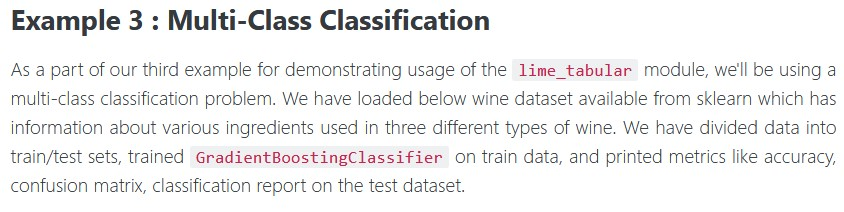

# from sklearn.datasets import load_wine
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

wine = load_wine()

for line in wine.DESCR.split("\n")[5:29]:
    print(line)

X, Y = wine.data, wine.target

print("Data Size : ", X.shape, Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80, test_size=0.2, stratify=Y, random_state=123)

print("Train/Test Sizes : ", X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

gb = GradientBoostingClassifier()

gb.fit(X_train, Y_train)

print("Test  Accuracy : %.2f"%gb.score(X_test, Y_test))
print("Train Accuracy : %.2f"%gb.score(X_train, Y_train))
print()
print("Confusion Matrix : ")
print(confusion_matrix(Y_test, gb.predict(X_test)))
print()
print("Classification Report")
print(classification_report(Y_test, gb.predict(X_test)))

# Below we have generation LimeTabularExplainer based on train data.

In [29]:
explainer = lime_tabular.LimeTabularExplainer(X_train, mode="classification",
                                              class_names=wine.target_names,
                                              feature_names=wine.feature_names,
                                             )

explainer

In [30]:
idx = random.randint(1, len(X_test))

print("Prediction : ", wine.target_names[gb.predict(X_test[idx].reshape(1,-1))[0]])
print("Actual :     ", wine.target_names[Y_test[idx]])

explanation = explainer.explain_instance(X_test[idx], gb.predict_proba, top_labels=3)

explanation.show_in_notebook()

Prediction :  class_2
Actual :      class_2


# predição de instancia errada

In [31]:
preds = gb.predict(X_test)

false_preds = np.argwhere((preds != Y_test)).flatten()

idx  = random.choice(false_preds)


print("Prediction : ", wine.target_names[gb.predict(X_test[idx].reshape(1,-1))[0]])
print("Actual :     ", wine.target_names[Y_test[idx]])

explanation = explainer.explain_instance(X_test[idx], gb.predict_proba, top_labels=3)

explanation.show_in_notebook()

Prediction :  class_0
Actual :      class_1


In [33]:
print("Explanation Local Prediction              : ", explanation.local_pred)
print("Explanation Global Prediction Probability : ", explanation.predict_proba)
print("Explanation Global Prediction             : ", wine.target_names[np.argmax(explanation.predict_proba)])

Explanation Local Prediction              :  [0.8833643]
Explanation Global Prediction Probability :  [9.99954243e-01 4.52109201e-05 5.46094924e-07]
Explanation Global Prediction             :  class_0


# Acima vemos a prababilidade de ser de cada classe com predict proba

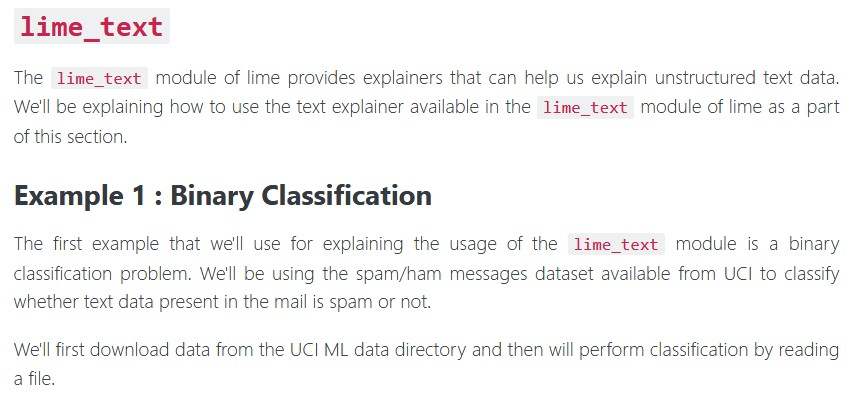 